# Ahoy! Are You Ready for Climate Model Data Analysis?
### Let's sail the high seas together, globally, with the analysis of a global oceanographic climate model.


Every few years, climate organizations from around the world submit their model outputs to the International Panel on Climate Change. These models run forward in time for to predict the future, and backward in time to fill in missing data points to create a very clean, robust view of what the world has looked like in the past. One of the best models in the world is created by the Goddard Institude of Space Science. Today, we will look at part of the [oceanographic model from their latest release](https://data.giss.nasa.gov/modelE/cmip6/) which contains data from 2011 to 2014 in an effort to:

1) Understand the interesting structure of the data.  
2) Determine the average surface ocean temperature throughout all years.  
3) Determine the average surface ocean temperature of the model in a specific month.  
4) Visualize the data from the model output on a global map.  
Bonus: Create an animated global plot of the data.  

Please note that this model is shared under Creative Commons Attribution ShareAlike 4.0 International License, and the original structure of the data has been modified to fit this exercise.

In [1]:
import xarray
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import calendar
import pandas as pd
from datetime import timedelta

### 1. The Structure of Climate Model Data

Climate data is most often saved in a netCDF (.nc) format, and represents a four-dimensional model of the world. Four dimensions, you say? Yes, four dimensions, as the fourth dimension in this case is time! Essentially, this means the data shows the evolution of a three-dimensional object over time (you can imagine one image of a globe, then another image, then another, all in a single, wrapper array. This array is the fourth dimension, holding all of the globes together in an array).

![alt text](http://www.askamathematician.com/wp-content/uploads/2011/05/cubes1.jpg)

### Load the Data

In [2]:
ds = xarray.open_dataset("../data/modified_thetao_Omon_GISS-E2-1-G_historical_r1i1p5f1_gn_201101-201412.nc", decode_times=False)
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 90, lev: 8, lon: 144, time: 48)
Coordinates:
  * lon        (lon) float64 0.625 3.125 5.625 8.125 ... 350.6 353.1 355.6 358.1
  * lat        (lat) float64 -89.5 -87.5 -85.5 -83.5 ... 82.5 84.5 86.5 88.5
  * lev        (lev) float64 5.0 80.0 181.0 ... 1.803e+03 2.899e+03 4.009e+03
  * time       (time) float64 5.878e+04 5.881e+04 ... 6.018e+04 6.021e+04
Dimensions without coordinates: bnds
Data variables:
    lon_bnds   (lon, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    lev_bnds   (lev, bnds) float64 ...
    time_bnds  (time, bnds) float64 ...
    thetao     (time, lev, lat, lon) float32 ...
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    contact:                Kenneth Lo (cdkkl@giss.nasa.gov)
    creation_date:          2020-03-20T01:59:38Z
    data_specs_version:     01.00.23
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacello volcello
    forcing_index:          1
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NASA-GISS.GI...
    grid:                   atmospheric grid: 144x90, ocean grid: 288x180
    grid_label:             gn
    history:                2020-03-20T01:59:38Z ; CMOR rewrote data to be co...
    initialization_index:   1
    institution:            Goddard Institute for Space Studies, New York, NY...
    institution_id:         NASA-GISS
    mip_era:                CMIP6
    model_id:               E214Tmatrixf10aF40oQ40
    nominal_resolution:     250 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_experiment_rip:  r1i1p5
    parent_mip_era:         CMIP6
    parent_source_id:       GISS-E2-1-G
    parent_time_units:      days since 2000-1-1
    parent_variant_label:   r1i1p5f1
    physics_index:          5
    product:                model-output
    realization_index:      1
    realm:                  ocean
    references:             https://data.giss.nasa.gov/modelE/cmip6
    source:                 GISS-E2.1G (2019): \naerosol: Varies with physics...
    source_id:              GISS-E2-1-G
    source_type:            AOGCM
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Omon
    table_info:             Creation Date:(21 March 2018) MD5:d211846f9d8f448...
    title:                  GISS-E2-1-G output prepared for CMIP6
    tracking_id:            hdl:21.14100/0341d700-69c8-46cc-8003-834593e5cd43
    variable_id:            thetao
    variant_label:          r1i1p5f1
    license:                CMIP6 model data produced by NASA Goddard Institu...
    cmor_version:           3.3.2

In [3]:
# new_ds = ds.isel(lev=range(0, len(ds.lev.values), 5))
# new_ds = new_ds.isel(lat=range(0, len(ds.lat.values), 2))
# new_ds = new_ds.isel(lon=range(0, len(ds.lon.values), 2))
# new_ds.to_netcdf("data/modified_thetao_Omon_GISS-E2-1-G_historical_r1i1p5f1_gn_201101-201412.nc")

### Isolate the Deepest Temperature
xarray uses dataframes similar to pandas. This makes it easy to work with the data. Below, we grab just the temperature data and also isolate the deepest temperature value for each time, latitude, and longitude.

In [4]:
temp = ds['thetao'] # Grab the temperature data
deepest_temp = temp[:,-1,:,:] # Get deepest value
deepest_temp

<xarray.DataArray 'thetao' (time: 48, lat: 90, lon: 144)>
[622080 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 0.625 3.125 5.625 8.125 ... 350.6 353.1 355.6 358.1
  * lat      (lat) float64 -89.5 -87.5 -85.5 -83.5 -81.5 ... 82.5 84.5 86.5 88.5
    lev      float64 4.009e+03
  * time     (time) float64 5.878e+04 5.881e+04 ... 6.018e+04 6.021e+04
Attributes:
    standard_name:  sea_water_potential_temperature
    long_name:      Sea Water Potential Temperature
    comment:        Diagnostic should be contributed even for models using co...
    units:          degC
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello volume: volcello
    history:        2020-03-20T01:59:38Z altered by CMOR: replaced missing va...

As it is described in the output above, our variable now consists of temperature data in three dimensions: time, latitude, and longitude. This represents the temperature of the world across time at a depth of 4,897 meters.

### 2. Find Average Surface Temperature
Hint: Obtain the temperature at a given depth similar to how we did in the previous code block. Then, use the np.mean to find the average value in the array.

In [5]:
# Your code here

# SOLUTION
surface_temp = temp[:,0,:,:]
np.mean(surface_temp)

<xarray.DataArray 'thetao' ()>
array(14.562134, dtype=float32)
Coordinates:
    lev      float64 5.0

### 3. Find the Average Surface Temperature at a Given Time
Hint: Create a new variable and assign it the value of the surface temperature for a particular month. Note that the data is given in days since January 1, 1850, on a 365-day calendar (according to the attributes above in the dataset) and because of this it may not look like a format you recognize.

In [6]:
def get_date(idx):
    """Write a function to take in month and year, which returns the correct idx to lookup for the user."""
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    years = ['2011', '2012', '2013', '2014']
    yr = idx // 12
    month = idx % 12
    return months[month] + "-" + years[yr]

In [7]:
# Your code here

# SOLUTION 1
jan_2011_surface1 = surface_temp[0,:,:]

# SOLUTION 2
jan_2011_surface2 = temp[0,0,:,:]
jan_2011_surface2

<xarray.DataArray 'thetao' (lat: 90, lon: 144)>
array([[      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       ...,
       [-1.756579, -1.776505, -1.792238, ..., -1.709179, -1.721966, -1.739973],
       [-1.726921, -1.73788 , -1.748135, ..., -1.699281, -1.707157, -1.716444],
       [-1.691561, -1.696118, -1.700097, ..., -1.679173, -1.682701, -1.686938]],
      dtype=float32)
Coordinates:
  * lon      (lon) float64 0.625 3.125 5.625 8.125 ... 350.6 353.1 355.6 358.1
  * lat      (lat) float64 -89.5 -87.5 -85.5 -83.5 -81.5 ... 82.5 84.5 86.5 88.5
    lev      float64 5.0
    time     float64 5.878e+04
Attributes:
    standard_name:  sea_water_potential_temperature
    long_name:      Sea Water Potential Temperature
    comment:        Diagnostic should be contributed even for models using co...
    units:          degC
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello volume: volcello
    history:        2020-03-20T01:59:38Z altered by CMOR: replaced missing va...

### 4. Plot Your Global Temperature Data
Using the function header below, determine how to pass in your temperature data into the function to create a plot of your data.

In [8]:
def plot_temperature_data(temperature_data):
    """This function takes in a 2-D array of temperature data. It results in a plot of the given data."""
    fig,ax = plt.subplots(figsize=(12,10))

    plt.title("Surface Ocean Temperatures", size=20)
    plt.xlabel("Longitude", size=12)
    plt.ylabel("Latitude", size=12)
    ax.contourf(temperature_data, cmap=plt.cm.jet)

    ax.set_xticks(np.arange(0, 145, 24))
    ax.set_xticklabels(np.arange(-180, 181, 60))
    ax.set_yticks(np.arange(0, 91, 22))
    ax.set_yticklabels(np.arange(-90, 91, 45))

    plt.show()

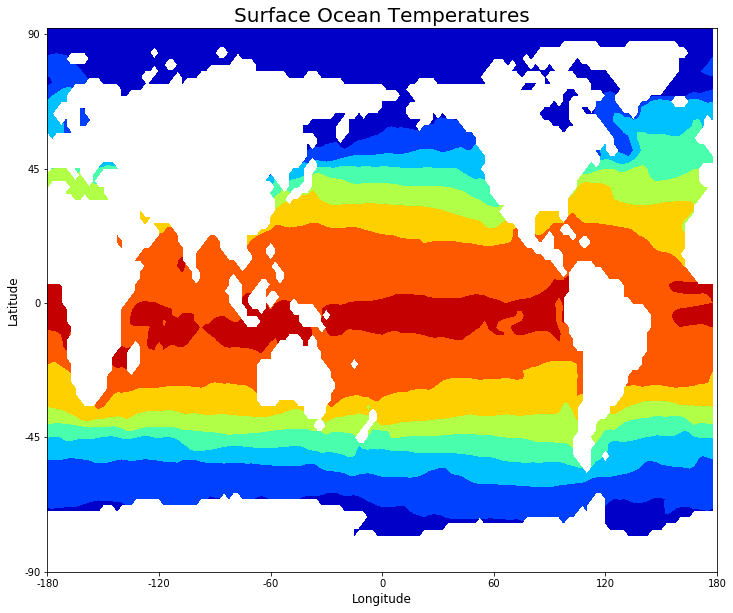

In [9]:
plot_temperature_data(jan_2011_surface1)

### Bonus: Create an Animated Plot of Temperature Data
Using the function header below, determine how to pass your temperature data into the function to create an animated plot of your data. This won't show up in a Jupyter Notebook. Then, execute it as HTML using the following cell.

MovieWriter ffmpeg unavailable.


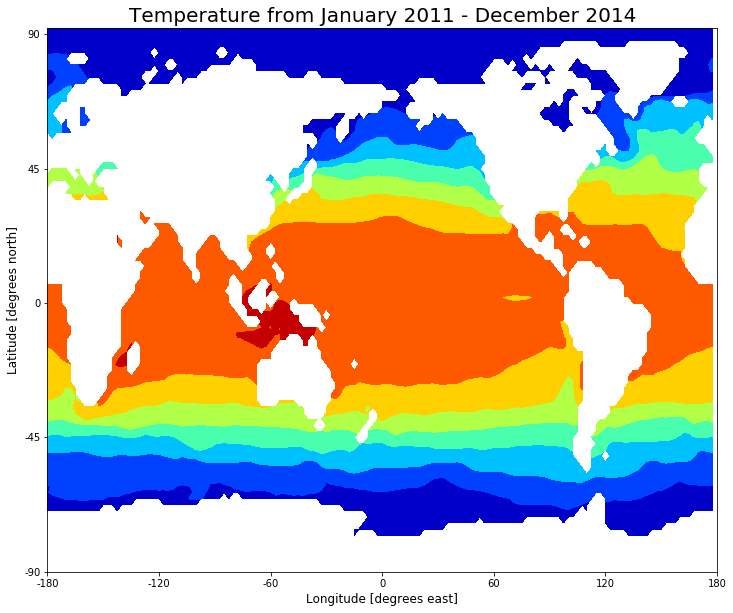

In [10]:
def create_animation(temperature_data, fp="../images/GISS_climate_model_animation.gif"):
    """This function takes in a 3-D array of temperature data. It creates an animated plot of the data as a gif
    and saves it to the given filepath."""
    fig,ax = plt.subplots(figsize=(12,10))

    def animate(i):
        """This function adds animation functionality to the figure."""
        plt.title("Surface Ocean Temperatures")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")

        ax.clear()
        ax.contourf(temperature_data[i,:,:], cmap=plt.cm.jet)
        ax.set_title('Temperature from January 2011 - December 2014', size=20) # Set title and get title from list
        # Change axis values and labels
        ax.set_xticks(np.arange(0, 145, 24))
        ax.set_xticklabels(np.arange(-180, 181, 60))
        ax.set_yticks(np.arange(0, 91, 22))
        ax.set_yticklabels(np.arange(-90, 91, 45))
        ax.set_xlabel("Longitude [degrees east]", size=12)
        ax.set_ylabel("Latitude [degrees north]", size=12)

    interval = 0.4 # in seconds
    ani = animation.FuncAnimation(fig,animate,48,interval=interval*1e+3,blit=False)

    ani.save(fp)
    
create_animation(surface_temp)

In [11]:
%%html
<iframe src="../images/GISS_climate_model_animation.gif" width=900, height=700</iframe>